In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/CV/yolov3.weights

--2025-04-23 16:32:13--  https://storage.yandexcloud.net/academy.ai/CV/yolov3.weights
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/x-www-form-urlencoded]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  15.1MB/s    in 17s     

2025-04-23 16:32:32 (13.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/CV/chess_yolo.zip

--2025-04-23 16:32:32--  https://storage.yandexcloud.net/academy.ai/CV/chess_yolo.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39275734 (37M) [application/x-zip-compressed]
Saving to: ‘chess_yolo.zip’

chess_yolo.zip      100%[===================>]  37.46M  9.64MB/s    in 5.1s    

2025-04-23 16:32:38 (7.38 MB/s) - ‘chess_yolo.zip’ saved [39275734/39275734]



In [ ]:
!unzip -qo "chess_yolo.zip"

In [ ]:
yaml_path = './chess_yolo/data.yaml'

In [ ]:
import ultralytics
from ultralytics import YOLO
import os
import random
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
ultralytics.checks()


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
import ultralytics
from ultralytics import YOLO

model = YOLO('yolov3.pt')

PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:02<00:00, 76.6MB/s]


In [ ]:
results = model.train(
    data=yaml_path,   # путь к конфигурационному файлу
    epochs=5,        # число эпох
    batch=32,         # размер пакета
    imgsz=480,        # размер входного изображения
    plots= True)       # сохранять графики

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=./chess_yolo/data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, 

100%|██████████| 22.2M/22.2M [00:00<00:00, 168MB/s]

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              


  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  8  18886656  ultralytics.nn.modules.block.Bottleneck      [512, 512]                    
  9                  -1  1   4720640  ultralytics.nn.modules.conv.Conv             [512, 1024, 3, 2]             
 10                  -1  4  37761024  ultralytics.nn.modules.block.Bottleneck      [1024, 1024]                  
 11                  -1  1   9440256  ultralytics.nn.modules.block.Bottleneck      [1024, 1024, False]           
 12                  -1  1    525312  ultralytics.nn.modules.conv.Conv             [1024, 512, 1, 1]             
 13                  -1  1   4720640  ultralytics.nn.modules.conv.Conv             [512, 1024, 3, 1]             
 14                  -1  1    525312  ultralytics.nn.modules.conv.Conv             [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 841.7±344.8 MB/s, size: 23.6 KB)


train: Scanning /content/chess_yolo/train/labels... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:00<00:00, 1768.32it/s]

train: /content/chess_yolo/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.0fe973299ff9e73874d9e684cba4e406.jpg: 1 duplicate labels removed
train: /content/chess_yolo/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.5e1a9d49ad09f5a7549225a05e1f66a6.jpg: 1 duplicate labels removed
train: /content/chess_yolo/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.bb226be189ee3a6399fbbd5080852e5b.jpg: 1 duplicate labels removed
train: New cache created: /content/chess_yolo/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 395.5±251.3 MB/s, size: 23.6 KB)


val: Scanning /content/chess_yolo/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 752.36it/s]

val: New cache created: /content/chess_yolo/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5        14G      2.148      4.973      1.556        430        480:   5%|▌         | 1/19 [00:02<00:39,  2.19s/it]

        1/5        14G      2.081      4.983      1.555        360        480:  11%|█         | 2/19 [00:03<00:28,  1.68s/it]
100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]
        1/5        14G      1.652      3.424      1.336        274        480: 100%|██████████| 19/19 [00:25<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]

                   all         58        386      0.393      0.485      0.336      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      13.3G      1.212     0.9323       1.07        372        480: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         58        386      0.638      0.858      0.653      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      14.1G      1.135     0.6896      1.044        638        480: 100%|██████████| 19/19 [00:25<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         58        386      0.648      0.837      0.588      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      13.2G      1.085     0.5807      1.022        537        480: 100%|██████████| 19/19 [00:25<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         58        386      0.965      0.942      0.981      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      13.8G       1.04     0.5367      1.001        401        480: 100%|██████████| 19/19 [00:25<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         58        386       0.97      0.988      0.986      0.741



5 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv3 summary (fused): 96 layers, 103,674,263 parameters, 0 gradients, 282.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


                   all         58        386       0.97      0.988      0.986      0.741
           черный слон         13         22      0.999      0.955      0.961      0.665
         черный король         29         29      0.994          1      0.995      0.796
           черный конь         26         30      0.984          1      0.995      0.717
          черная пешка         25         77      0.989          1      0.995      0.746
          черный ферзь         11         11      0.898          1      0.995      0.796
          черная ладья         24         28      0.984          1      0.995      0.715
            белый слон         17         22      0.935          1      0.987      0.719
          белый король         29         29          1      0.999      0.995      0.789
            белый конь         17         19      0.925          1      0.956      0.703
           белая пешка         26         77      0.994          1      0.995      0.756
           белый ферз

In [ ]:
test_dir = "./chess_yolo/test"
img_dir = os.path.join(test_dir, '*.jpg')
files = glob.glob(img_dir)


image 1/1 /content/chess_yolo/test/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg: 480x480 1 черный конь, 62.7ms
Speed: 2.8ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 480)


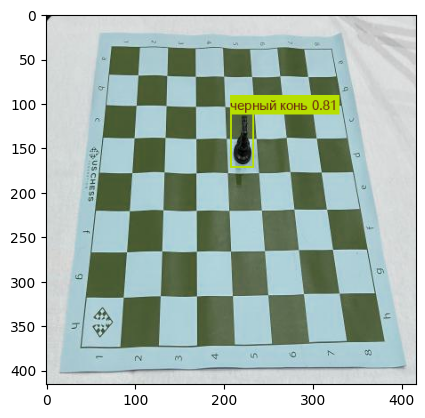

In [ ]:
image_test_path = random.choice(files)
pred = model.predict(source=image_test_path)
test_image = pred[0].plot(line_width=2)
plt.imshow(test_image)